In [1]:
import numpy as np

## Biegebalken

### 1) Definition der Größen



In [2]:
# Streckenlast
q = 2. #kN/m

# Materialeigenschaft
E = 21400.  #N/mm^2

# Balkendimensionen
L = 2.      #m
B = 200     #mm
H = 50      #mm

# Berechnungsstellen für Diagramm
x = np.linspace(0, L, 101) #m

# Balkenflächenmoment
I = B * H**3 / 12 #mm^4 
print('I[mm^4]', I)

I[mm^4] 2083333.3333333333


### 2) Steckenlast $q(x)$

Konstante Streckenlast $\rightarrow q(x) = q$

In [3]:
# konstante Streckenlast
print('q [kN/m]:', q)

q [kN/m]: 2.0


#### 2a) Resultierende Kraft $F_q$

$$F_q=\int\limits_0^Lq(x)dx\overset{hier}{=}qL$$

In [4]:
# resultierende Kraft
F_q = q * L
print('F_q [kN]:', F_q)

F_q [kN]: 4.0


#### 2b) Angriffspunkt

$$x_s=\frac{\int q(x)xdx}{\int q(x)dx}=\frac{L}{2}$$

In [5]:
# Angriffspunkt der Kraft
x_s = L/2.
print('x_s [m]:', x_s)

x_s [m]: 1.0


### 3) Auflagerkräfte

#### 3a) Horizontal $A_h$

$$\sum\limits_i F_{i,h}\overset{!}{=}0$$
$$A_h\overset{hier}{=}0$$


In [6]:
# Horizontalkraft
A_h = 0.
print('A_h [kN]:', A_h)

A_h [kN]: 0.0


#### 3b) Vertikal $A_v$

$$\begin{aligned}
\sum\limits_i F_{i,v}\overset{!}{=}0&\overset{hier}{=}2A_v-F_q\\
&\rightarrow A_v = \frac{F_q}{2} = \frac{q}{2}L
\end{aligned}$$

In [7]:
# Vertikalkraft
A_v = F_q/2.
print('A_v [kN]:', A_v)

A_v [kN]: 2.0


### 4) Schnittbetrachtung

#### 4a) Normalkraft $N$

$$\begin{aligned}
\sum\limits_i F_{i,h}\overset{!}{=}0&\overset{hier}{=}A_h+N\\
&\rightarrow N = 0
\end{aligned}$$

In [8]:
# Normalkraft
N = 0.
print('N [kN]:', N)

N [kN]: 0.0


#### 4b) Querkraft $Q$

$$\begin{aligned}
\sum\limits_i F_{i,v}\overset{!}{=}0&\overset{hier}{=}A_v-Q-\int\limits_0^xq(\tilde{x})d\tilde{x}\\
&\rightarrow Q(x) = A_v-qx=\frac{q}{2}(L-2x)
\end{aligned}$$

In [9]:
# Querkraft
Q = A_v - q * x
print('Q(x) [kN]:', Q[::20])

Q(x) [kN]: [ 2.   1.2  0.4 -0.4 -1.2 -2. ]


#### 4c) Biegemoment $M_B$

$$\begin{aligned}
\sum\limits_i M_{i}\overset{!}{=}0&\overset{hier}{=}-A_v x +\int\limits_0^x\int\limits_0^xq(\tilde{x})d\tilde{x}d\tilde{x} + M_B\\
&\rightarrow M_B(x) = A_vx-\frac{q}{2}x^2=\frac{q}{2}(Lx-x^2)
\end{aligned}$$


In [10]:
# Biegemoment
M_B = A_v * x - q/2. * x**2
print('M_B(x) [kN]:', M_B[::20])

M_B(x) [kN]: [0.   0.64 0.96 0.96 0.64 0.  ]


### 5) Durchbiegung

#### 5a) Biegelinie mit Konstanten
$$w_B''(x)=-\frac{M_B}{EI}$$

$$\begin{aligned}
w_B''(x)&\overset{hier}{=}-\frac{q}{2EI}(Lx-x^2)\\
w_B'(x) &=-\frac{q}{2EI} \int \left(Lx-x^2\right)dx = -\frac{q}{2EI}\left[\frac{L}{2}x^2-\frac{1}{3}x^3 + C_1\right]\\
w_B(x) &=-\frac{q}{2EI} \int \left[\frac{L}{2}x^2-\frac{1}{3}x^3 + C_1\right]dx \\
&= -\frac{q}{2EI}\left[\frac{L}{6}x^3-\frac{1}{12}x^4 + C_1x + C_2\right]
\end{aligned}$$

#### 5b) Randwerte

$$\begin{aligned}
w_B(x=0)&\overset{!}{=}0=-\frac{q}{2EI}C_2\\
\rightarrow& C_2=0\\
w_B(x=L)&\overset{!}{=}0\\
\rightarrow& C_1= -\frac{L^3}{12}
\end{aligned}
$$

mit $0=\frac{L^4}{6}-\frac{L^4}{12}+C_1L=\frac{L^3}{12}+C_1$

#### 5c) Biegelinie und Randwerte

$$\begin{aligned}
w_B(x) &= -\frac{q}{2EI}\left[\frac{L}{6}x^3-\frac{1}{12}x^4 + C_1x + C_2\right]\\
&=-\frac{q}{2EI}\left[\frac{L}{6}x^3-\frac{1}{12}x^4 - \frac{L^3}{12}x\right]\\
&=-\frac{q}{24EI}\left[2Lx^3-x^4 - L^3x\right]
\end{aligned}$$

In [11]:
# Biegelinie
w_B = - q / (24 * E * I) * (2 * L * x**3 - x**4 - L**3 * x) * (1e3)**4
print('w_B (x) [mm]', w_B[::20])

w_B (x) [mm] [-0.          5.55065421  8.90018692  8.90018692  5.55065421 -0.        ]


#### 5d) Maximale Durchbiegung

$$\begin{aligned}
w_B^{max} &=w_B(x=L/2)\\
&=-\frac{q}{24EI}\left[2L\left(\frac{L}{2}\right)^3-\left(\frac{L}{2}\right)^4 - L^3\left(\frac{L}{2}\right)\right]\\
&=-\frac{q}{24EI}\left[\frac{L^4}{4}-\frac{L^4}{16}-\frac{L^4}{2}\right]=-\frac{qL^4}{24EI}\frac{(-5)}{16}\\
w_B^{max}&=\frac{5qL^4}{384EI}
\end{aligned}$$

In [12]:
# maximale Durchbiegung
w_B_max = (5 * q * L**4) * (1e3)**4 / (384 * E * I)
print('w_B_max [mm]', w_B_max)

w_B_max [mm] 9.345794392523365


### 6) Maximale Normalspannung
$$\sigma_{max}=M_B\frac{a_{max}}{I}$$

$$\sigma_{max}=M_B\frac{H}{2I}$$

In [13]:
# Maximale Normalspannung
sigma_max = M_B * 1e3 * 1e3 * H / (2 * I)
print('sigma_max (x) [N/mm^2]', sigma_max[::20])

sigma_max (x) [N/mm^2] [ 0.    7.68 11.52 11.52  7.68  0.  ]


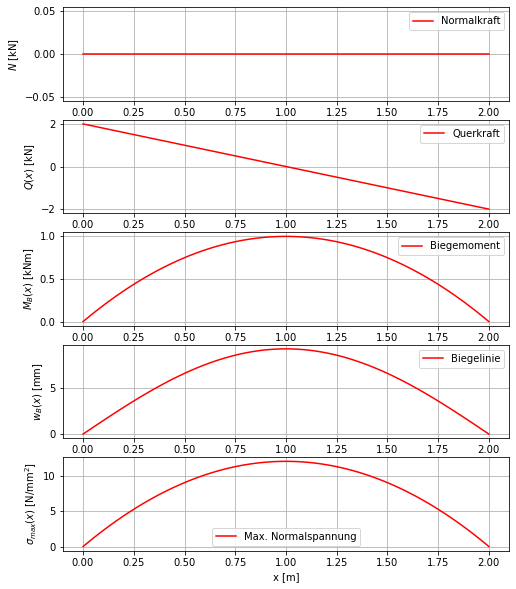

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))

# Diagramm Normalkraft
ax = fig.add_subplot(511)
plt.plot(x, N*x, 'r-', label='Normalkraft')
plt.ylabel(r'$N$ [kN]')
plt.grid()
plt.legend()

# Diagramm Querkraft
ax = fig.add_subplot(512)
plt.plot(x, Q, 'r-', label='Querkraft')
plt.ylabel(r'$Q(x)$ [kN]')
plt.grid()
plt.legend()

# Diagramm Biegemoment
ax = fig.add_subplot(513)
plt.plot(x, M_B, 'r-', label='Biegemoment')
plt.ylabel(r'$M_B(x)$ [kNm]')
plt.grid()
plt.legend()

# Diagramm Biegelinie
ax = fig.add_subplot(514)
plt.plot(x, w_B, 'r-', label='Biegelinie')
plt.ylabel(r'$w_B(x)$ [mm]')
plt.grid()
plt.legend()

# Diagramm Maximale Normalspannung
ax = fig.add_subplot(515)
plt.plot(x, sigma_max, 'r-', label='Max. Normalspannung')
plt.ylabel(r'$\sigma_{max}(x)$ [N/mm$^2$]')
plt.xlabel('x [m]')
plt.grid()
plt.legend()